## Copyright 2022 The Cirq Developers

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

# Cirq basics

<table class="tfo-notebook-buttons" align="left">
  <td>
    <a target="_blank" href="https://quantumai.google/cirq/tutorials/gibbs_sampling_from_quantum_bayesian_network"><img src="https://quantumai.google/site-assets/images/buttons/quantumai_logo_1x.png" />View on QuantumAI</a>
  </td>
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/quantumlib/Cirq/blob/master/docs/tutorials/gibbs_sampling_from_quantum_bayesian_network.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/colab_logo_1x.png" />Run in Google Colab</a>
  </td>
  <td>
    <a target="_blank" href="https://github.com/quantumlib/Cirq/blob/master/docs/tutorials/gibbs_sampling_from_quantum_bayesian_network.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/github_logo_1x.png" />View source on GitHub</a>
  </td>
  <td>
    <a href="https://storage.googleapis.com/tensorflow_docs/Cirq/docs/tutorials/gibbs_sampling_from_quantum_bayesian_network.ipynb"><img src="https://quantumai.google/site-assets/images/buttons/download_icon_1x.png" />Download notebook</a>
  </td>
</table>

This toturial shows how the use the Bayesian network gate to do Gibbs sampling.

To begin, please follow the instructions for [installing Cirq](../install.md). We also add some useful imports.

In [1]:
try:
    import cirq
except ImportError:
    print("installing cirq...")
    !pip install --quiet cirq --pre
    print("installed cirq.")

import cirq.contrib.bayesian_network as ccb
from matplotlib import pyplot as plt
import numpy as np

## Bayesian network

We want to build the following network:
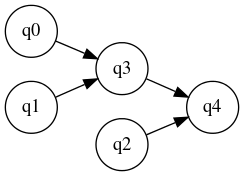

With the probabilities for the independent variables:

$p(q_0=1)=0.3$

$p(q_1=1)=0.6$

$p(q_2=1)=0.3$



And the following probabilities for the dependent variable $q_3$:

$p(q_3=1 | q_0=0, q_1=0) = 0.01$

$p(q_3=1 | q_0=0, q_1=1) = 0.02$

$p(q_3=1 | q_0=1, q_1=0) = 0.03$

$p(q_3=1 | q_0=1, q_1=1) = 0.04$



and $q_4$:

$p(q_4=1 | q_2=0, q_3=0) = 0.40$

$p(q_4=1 | q_2=0, q_3=1) = 0.10$

$p(q_4=1 | q_2=1, q_3=0) = 0.70$

$p(q_4=1 | q_2=1, q_3=1) = 0.90$




In [2]:
qubits = cirq.LineQubit.range(5)

qbn_gate = ccb.BayesianNetworkGate(
    [('q0', 0.3), ('q1', 0.6), ('q2', 0.3), ('q3', None), ('q4', None)],
    [(('q3'), ('q0', 'q1',), [0.01, 0.02, 0.03, 0.04]),
     (('q4'), ('q2', 'q3',), [0.40, 0.10, 0.70, 0.90])])

We can now sample from the circuit and get all the probabilities:

In [3]:
circuit_only_qbn = cirq.Circuit([qbn_gate.on(*qubits)])
phi = cirq.Simulator().simulate(
    circuit_only_qbn,
    qubit_order=qubits,
    initial_state=0).state_vector()
probs = abs(phi) ** 2

for i, prob in enumerate(probs):
    print("p(q0,q1,q2,q3,q4 = {i:05b}) = {prob:.6f}"
          .format(i=i, prob=prob))
    

p(q0,q1,q2,q3,q4 = 00000) = 0.116424
p(q0,q1,q2,q3,q4 = 00001) = 0.077616
p(q0,q1,q2,q3,q4 = 00010) = 0.001764
p(q0,q1,q2,q3,q4 = 00011) = 0.000196
p(q0,q1,q2,q3,q4 = 00100) = 0.024948
p(q0,q1,q2,q3,q4 = 00101) = 0.058212
p(q0,q1,q2,q3,q4 = 00110) = 0.000084
p(q0,q1,q2,q3,q4 = 00111) = 0.000756
p(q0,q1,q2,q3,q4 = 01000) = 0.172872
p(q0,q1,q2,q3,q4 = 01001) = 0.115248
p(q0,q1,q2,q3,q4 = 01010) = 0.005292
p(q0,q1,q2,q3,q4 = 01011) = 0.000588
p(q0,q1,q2,q3,q4 = 01100) = 0.037044
p(q0,q1,q2,q3,q4 = 01101) = 0.086436
p(q0,q1,q2,q3,q4 = 01110) = 0.000252
p(q0,q1,q2,q3,q4 = 01111) = 0.002268
p(q0,q1,q2,q3,q4 = 10000) = 0.048888
p(q0,q1,q2,q3,q4 = 10001) = 0.032592
p(q0,q1,q2,q3,q4 = 10010) = 0.002268
p(q0,q1,q2,q3,q4 = 10011) = 0.000252
p(q0,q1,q2,q3,q4 = 10100) = 0.010476
p(q0,q1,q2,q3,q4 = 10101) = 0.024444
p(q0,q1,q2,q3,q4 = 10110) = 0.000108
p(q0,q1,q2,q3,q4 = 10111) = 0.000972
p(q0,q1,q2,q3,q4 = 11000) = 0.072576
p(q0,q1,q2,q3,q4 = 11001) = 0.048384
p(q0,q1,q2,q3,q4 = 11010) = 0.004536
p

We can marginalize the probabilities to check that the circuit is outputting correct values. In particular, we recorver the correct probability for $q_2$ and see that $q_3$ has a very low probability.

In [4]:
print("p(q2 = 1) = {prob:.6f}".format(
    prob=sum(prob for i, prob in enumerate(probs) if i & 0x04)))

print("p(q3 = 1) = {prob:.6f}".format(
    prob=sum(prob for i, prob in enumerate(probs) if i & 0x02)))

p(q2 = 1) = 0.300000
p(q3 = 1) = 0.022000


# Gibbs sampling
Let's say we want to sample for $q_3 = 1$. We could ramdomly generate samples and hope that $q_3 = 1$. We reject samples that do not follow the condition, and only keep the ones that do. We don't even need a quantum computer for this.

However, give the low probability of $q_3 = 1$, we will reject most of our samples. Instead, we can use Grover's amplification to get more samples.

We thus define the two operations of the algorithm, the oracle and the diffuser:

In [5]:
def oracle(qubits):
    # This Oracle should favor |???1?>
    yield cirq.Z(qubits[3])

def diffuser(qubits):
    for q in qubits:
        yield cirq.H(q)
        yield cirq.X(q)

    yield cirq.Z(qubits[-1]).controlled_by(*qubits[0:-1])

    for q in qubits:
        yield cirq.X(q)
        yield cirq.H(q)
    yield -1.0 * cirq.I(qubits[0])

Let us look at the effect of the two steps on the state vector. We only plot the real value, as the imaginary part is zero. First let's look at the effect of the Oracle.

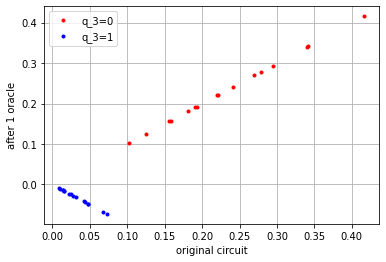

In [6]:
def compare_amplitudes(circuit_1, circuit_2, qubits):
    phi_1 = cirq.Simulator().simulate(
        circuit_1,
        qubit_order=qubits,
        initial_state=0).state_vector()
    
    phi_2 = cirq.Simulator().simulate(
        circuit_2,
        qubit_order=qubits,
        initial_state=0).state_vector()
    
    idx_q3_is_0 = [i for i in range(2 ** 5) if i & 0x02 == 0]
    idx_q3_is_1 = [i for i in range(2 ** 5) if i & 0x02 != 0]
    
    plt.plot(phi_1[idx_q3_is_0].real, phi_2[idx_q3_is_0].real, '.r')
    plt.plot(phi_1[idx_q3_is_1].real, phi_2[idx_q3_is_1].real, '.b')
    plt.grid()
    plt.legend(['q_3=0', 'q_3=1'])

circuit_after_1_oracle = cirq.Circuit(
    [qbn_gate.on(*qubits), oracle(qubits)])
    
compare_amplitudes(circuit_only_qbn, circuit_after_1_oracle, qubits)
plt.xlabel('original circuit');
plt.ylabel('after 1 oracle');

Each point corresponds to one outcome (there are 32 points total, 16 blue where $q_3=1$) and the axes are the real magnitude of the state vector (i.e. the square root of the probability). We observe two things: First, as expected the outcomes $q_3=1$ have low probabilities. Second, the oracle indeed flips the magnitude of the state vector.

Let's apply the amplification step:


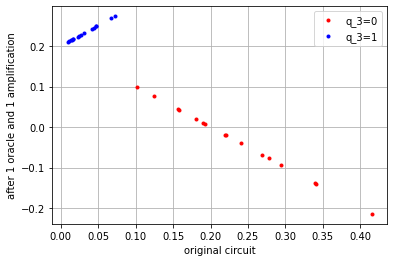

In [7]:
circuit_after_1_oracle_1_amplification = cirq.Circuit(
    [qbn_gate.on(*qubits), oracle(qubits), diffuser(qubits)])
    
compare_amplitudes(
    circuit_only_qbn, circuit_after_1_oracle_1_amplification, qubits)
plt.xlabel('original circuit');
plt.ylabel('after 1 oracle and 1 amplification');